In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
Pkl_Filename = "HOG.pkl"
sc_file= "HOG_sc.pkl"
global sc
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

with open(sc_file, 'rb') as file:  
    sc = pickle.load(file)

Using TensorFlow backend.


In [177]:
df = pd.read_csv("HOG.csv",index_col="Date",parse_dates=True)
df= df[int(len(df)*(4/5)):]
df= df[['Open']]
# df=df[-60:]
test_data= df
# testing_df= sc.transform(testing_df)

In [178]:
len(test_data)

504

In [179]:
x_input=test_data[-60:]
x_input= sc.transform(x_input)

In [180]:
# x_input.shape
temp_input=list(x_input)
# temp_input=temp_input[0].tolist()

In [181]:
train_days= 60
df= df[['Open']]

lst_output=[]
n_steps=60
i=0;
while(i<5):
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=regressor.predict(x_input,verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=regressor.predict(x_input,verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.18740597]
61
1 day input [array([0.05651532]) array([0.06212099]) array([0.04877408])
 array([0.06025245]) array([0.10082716]) array([0.11203856])
 array([0.07546792]) array([0.10296267]) array([0.10403045])
 array([0.11283938]) array([0.10483123]) array([0.09789081])
 array([0.09762383]) array([0.10990306]) array([0.13019044])
 array([0.11364021]) array([0.10963614]) array([0.10830147])
 array([0.10936917]) array([0.08507775]) array([0.10776754])
 array([0.13499533]) array([0.11417411]) array([0.08160755])
 array([0.11471519]) array([0.13314712]) array([0.11605082])
 array([0.10349576]) array([0.1109754]) array([0.0847967])
 array([0.04793289]) array([0.04552873]) array([0.00652789])
 array([0.00465794]) array([-0.00495867]) array([-0.02472622])
 array([-0.03300727]) array([-0.01377393]) array([-0.0089656])
 array([-0.00923273]) array([0.01561024]) array([0.00358945])
 array([0.05754956]) array([0.08880368]) array([0.08372821])
 array([0.1109754]) array([0.13474988]) array([0.11017

C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [182]:
len(lst_output)

5

In [183]:
lst_output=lst_output[0:5]

In [184]:
predicted_stock_price = lst_output

In [185]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [186]:
predicted_stock_price=np.array(predicted_stock_price)

In [187]:
df3=pd.DataFrame(predicted_stock_price)

In [188]:
data=df[-1:]

In [189]:
df2=pd.read_csv("HOG.csv",parse_dates=True)
s=df2.iloc[-1:,[0]]

In [190]:
s

,Date
2516,2020-10-27


In [191]:
result=s.to_string(index=False)

In [192]:
result=result[-10:]

In [193]:
result

'2020-10-27'

In [194]:
index_ = pd.date_range(result, periods = 6, freq ='D')
index_= index_[-5:]
index_

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01'],
              dtype='datetime64[ns]', freq='D')

In [195]:
df3

,0
0,31.141185
1,31.225121
2,31.159527
3,31.065975
4,31.002715


In [196]:
df3.set_index(index_,inplace=True, drop = False)

In [197]:
df3

,0
2020-10-28,31.141185
2020-10-29,31.225121
2020-10-30,31.159527
2020-10-31,31.065975
2020-11-01,31.002715


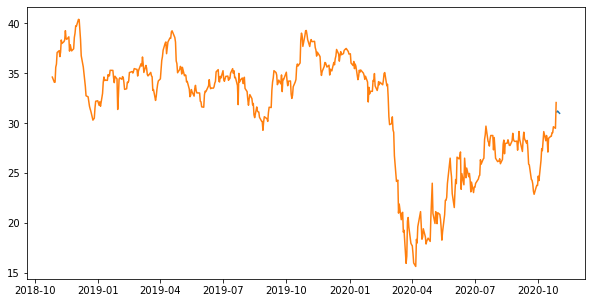

In [198]:
plt.figure(figsize=(10,5))
plt.plot(df3)
plt.plot(df)

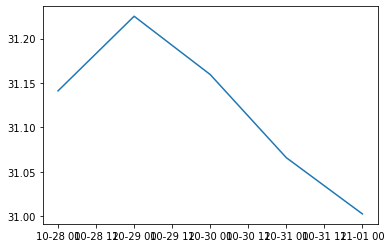

In [199]:
plt.plot(df3)